In [118]:
%pylab inline

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

In [4]:
import random

In [22]:
def one_every_n(length, n):
    i = random.randint(0, n)
    x = np.array(range(length))
    return np.remainder(x, n) == i

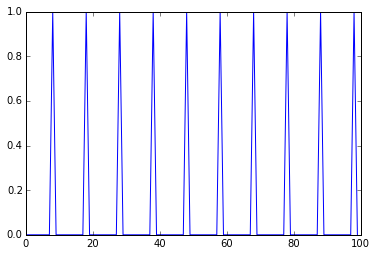

In [27]:
plot(one_every_n(100, 10))

In [55]:
def batch(batch_size, fn, *args):
    X = np.array([fn(*args) for i in range(batch_size)])
    return X[:,:-1,None], X[:,1:,None]

In [56]:
batch(10, one_every_n, 10, 2)[0].shape

(10, 9, 1)

In [282]:
import random

In [273]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.core import TimeDistributedDense

In [331]:
def random_sample():
    return {
        'learning_rate': random.uniform(0.1, 1),
        'recurrent_layer': random.choice([LSTM, GRU, SimpleRNN]),
        'activation': random.choice(['sigmoid', 'tanh']),
        'every_n': random.randint(2, 20),
        'n_hidden': random.randint(1, 20),
        'n_layers': random.randint(2, 4),
        'tdd_in': random.choice([True, False]),
        'tdd_out': random.choice([True, False]),
    }

In [332]:
def build_model(learning_rate=None, recurrent_layer=None, n_hidden=None, n_layers=None, tdd_in=None, tdd_out=None, activation=None, **kwargs):
    model = Sequential()

    if tdd_in:
        model.add(TimeDistributedDense(input_dim=1, output_dim=n_hidden))
    else:
        model.add(recurrent_layer(input_dim=1, output_dim=n_hidden, activation=activation, return_sequences=True))

    for i in range(n_layers - 2):
        model.add(recurrent_layer(input_dim=n_hidden, output_dim=n_hidden, activation=activation, return_sequences=True))

    if tdd_out:
        model.add(TimeDistributedDense(input_dim=n_hidden, output_dim=1))
    else:
        model.add(recurrent_layer(input_dim=n_hidden, output_dim=1, activation=activation, return_sequences=True))

    sgd = SGD(lr=learning_rate)
    
    model.compile(loss='mean_squared_error', optimizer=sgd)

    return model

In [333]:
BATCH_SIZE = 1024*128
LENGTH = 128

In [ ]:
import json

for i in range(1):
    # build model
    params = random_sample()
    model = build_model(**params)

    # make training data
    X, Y = batch(BATCH_SIZE, one_every_n, LENGTH, params['every_n'])

    # train model
    history = model.fit(X, Y, nb_epoch=1, batch_size=128)

    # log to file one line per model, data represented by json
    params['loss'] = history.history['loss'][0]
    with open('log', 'a') as f:
        f.write(json.dumps(params))

In [ ]:
# predict one example
X, Y = batch(1, one_every_n, LENGTH, params['every_n'])
Y_out = model.predict(X)

In [ ]:
# plot example

plot(X[0,:])
show()
# plot(Y[0,:])
plot(Y_out[0,:])
show()